In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('mental-heath-in-tech-2016_20161114.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you know local or online resources to seek help for a mental health disorder?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Do you have previous employers?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not?,Would you bring up a mental health issue with a potential employer in an interview?,Why or why not?.1,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a menta

In [3]:
# number of cols & rows
df.shape

(1433, 63)

In [4]:
# Remove non-tech companies & nan (only tech companies are included in the analysis)
for i in range(df.shape[0]):
    if (df["Is your employer primarily a tech company/organization?"][i] != 1. \
    and df["Is your primary role within your company related to tech/IT?"][i] != 1.)\
    or df["Is your employer primarily a tech company/organization?"][0] == None:
        df.drop(i, inplace=True)
df.shape[0]

1131

In [5]:
# Give the percentage of missing values for each column, and order them by the largest to smallest
round((df.isnull().sum() * 100/ len(df)),2).sort_values(ascending=False)

If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?                                                        100.00
If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?                                                100.00
If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?                                                        100.00
If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?                                                              100.00
Do you have medical coverage (private insurance or state-provided) which includes treatment of  mental health issues?                                                               100.00
If you have revealed a mental health issue to a coworker or emplo

In [6]:
# Remove any column that has more than 50% missing values
def rem_missing(df):
    most_missing_cols = set(df.columns[df.isnull().sum()/len(df) > .5])
    
    for col in most_missing_cols:
        df.drop(columns= col, inplace= True)
        
    return df

rem_missing(df)
df.shape

(1131, 50)

In [7]:
# view the details of the numeric variables
df.describe()

,Are you self-employed?,Is your employer primarily a tech company/organization?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?
count,1131.0,1131.000000,1131.000000,1131.000000,1131.000000
mean,0.0,0.780725,0.886826,0.573828,33.607427
std,0.0,0.413938,0.316946,0.494738,11.658173
min,0.0,0.000000,0.000000,0.000000,3.000000
25%,0.0,1.000000,1.000000,0.000000,28.000000
50%,0.0,1.000000,1.000000,1.000000,32.000000
75%,0.0,1.000000,1.000000,1.000000,38.000000
max,0.0,1.000000,1.000000,1.000000,323.000000


In [8]:
# We can see that we have abnormal values in Age (323, 99 & 3), let's replace these abnormal values with the mean
df.loc[(df['What is your age?'] > 80) | (df['What is your age?'] < 15)] = 33
df["What is your age?"].value_counts()

30    77
28    66
29    63
31    62
32    60
33    59
26    58
35    57
27    55
34    52
37    46
36    43
39    41
38    39
24    38
25    35
40    30
22    27
23    23
45    22
44    21
43    21
42    21
41    20
46    16
21    13
47    11
49     8
52     6
48     5
20     5
50     4
51     4
55     4
57     3
53     2
56     2
19     2
63     2
70     1
66     1
54     1
58     1
59     1
61     1
62     1
17     1
Name: What is your age?, dtype: int64

In [9]:
# We can see there are alot of values for gender
df['What is your gender?'].unique()

array(['Male', 'male', 'Male ', 'Female', 'M', 'female', 'm',
       'I identify as female.', 'Bigender', 'non-binary',
       'Female assigned at birth ', 'F', 'man', 'fm', 'f', 'Cis female ',
       'Transitioned, M2F', 'Genderfluid (born female)',
       'Other/Transfeminine', 'Female or Multi-Gender Femme', 'woman',
       'female/woman', 'Cis male', 'Male.', 'Androgynous',
       'male 9:1 female, roughly', nan, 'Male (cis)', 33, 'Female ',
       'nb masculine', 'Cisgender Female', 'Man', 'Sex is male',
       'none of your business', 'genderqueer', 'cis male', 'Human',
       'Genderfluid', 'Enby', 'genderqueer woman', 'female ', 'Woman',
       'Queer', 'Agender', 'Dude', 'mail', 'Male/genderqueer', 'fem',
       'Nonbinary', 'male ',
       'Female (props for making this a freeform field, though)',
       'Cis Male', 'Male (trans, FtM)', 'Cis-woman', 'Genderqueer',
       'cisdude', 'Genderflux demi-girl',
       'female-bodied; no feelings about gender', 'cis man',
       'Tr

In [10]:
# Let's categorized the gender into (male, female, other)
male_gnd = ['Male', 'male', 'Male ', 'M', 'm', 'man', 'Cis male', 'Male.', 'Male (cis)', 'Man',\
            'Sex is male', 'cis male', 'Malr', 'Dude', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",\
            'mail', 'M|', 'male ', 'Cis Male', 'cis man', 'MALE', 'cisdude']

female_gnd = ['Female', 'female', 'I identify as female.', 'female ',  'Female assigned at birth ', 'F', 'Woman',\
             'fm', 'f', 'Cis female ', 'Female ', 'woman', 'female/woman', 'Cisgender Female', 'fem',\
             'Female (props for making this a freeform field, though)', ' Female', 'Cis-woman', 'AFAB']

# Fill nan with "other"
df['What is your gender?'].fillna("other", inplace = True)

# Replace values with (male, female, other)
for i in df['What is your gender?']:
    if i in male_gnd:
        df['What is your gender?'].replace(i, 'male', inplace = True)
    elif i in female_gnd:
        df['What is your gender?'].replace(i, 'female', inplace = True)
    else:
        df['What is your gender?'].replace(i, 'other', inplace = True)

In [11]:
# Check
df['What is your gender?'].unique()

array(['male', 'female', 'other'], dtype=object)

###  Does work remotely reduce the chance of having a mental health disorder in the tech workplace?

In [12]:
# We can see that we have only three answers for working remotly
df['Do you work remotely?'].unique()

array(['Sometimes', 'Never', 'Always', 33], dtype=object)

In [13]:
# Let's count each answer
always_count = sum(df['Do you work remotely?'] == 'Always')
sometimes_count = sum(df['Do you work remotely?'] == 'Sometimes')
never_count = sum(df['Do you work remotely?'] == 'Never')

print("Always count: ", always_count)
print("Sometimes count: ", sometimes_count)
print("Never count: ", never_count)

Always count:  217
Sometimes count:  600
Never count:  311


In [14]:
# Now let's count again but with haveing a mental disorder
always_with_md = df[(df['Do you currently have a mental health disorder?'].isin(['Yes', 'Maybe']))\
               & (df['Do you work remotely?'] == 'Always')].shape[0]

sometimes_with_md = df[(df['Do you currently have a mental health disorder?'].isin(['Yes', 'Maybe']))\
               & (df['Do you work remotely?'] == 'Sometimes')].shape[0]

never_with_md = df[(df['Do you currently have a mental health disorder?'].isin(['Yes', 'Maybe']))\
               & (df['Do you work remotely?'] == 'Never')].shape[0]

print("Always working remotly and having mental disorder: ", always_with_md)
print("Sometimes working remotly and having mental disorder: ", sometimes_with_md)
print("Never working remotly and having mental disorder: ", never_with_md)

Always working remotly and having mental disorder:  133
Sometimes working remotly and having mental disorder:  361
Never working remotly and having mental disorder:  200


Text(0.5, 1.0, 'Do you work remotely?')

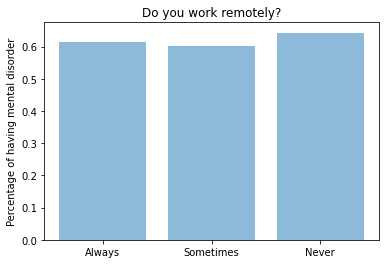

In [15]:
# We need to calculate the percentage of each one in order to compare them

always_perc = always_with_md/np.sum(df['Do you work remotely?'] == 'Always')
sometimes_perc = sometimes_with_md/np.sum(df['Do you work remotely?'] == 'Sometimes')
never_perc = never_with_md/np.sum(df['Do you work remotely?'] == 'Never')
    
obj = ('Always', 'Sometimes', "Never")
y_pos = np.arange(len(obj))
p = [always_perc, sometimes_perc, never_perc]

plt.bar(y_pos, p, align='center', alpha=0.5)
plt.xticks(y_pos, obj)
plt.ylabel('Percentage of having mental disorder')
plt.title("Do you work remotely?")

### ------------------------------------------------------------------------------------------------------------

### Who are more open to discuss their mental health condition (Males vs Females)?

In [16]:
# Count the number of male vs female

male_count = sum(df['What is your gender?'] == 'male')
female_count = sum(df['What is your gender?'] == 'female')
other_count = sum(df['What is your gender?'] == 'other')

print("Male count: ", male_count)
print("Female count: ", female_count)
print("Other count: ", other_count)

Male count:  838
Female count:  259
Other count:  34


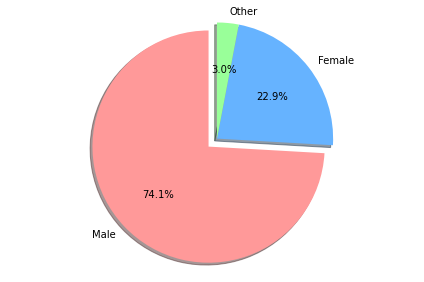

In [17]:
# Pie chart
labels = ['Male', 'Female', 'Other']
sizes = [male_count, female_count, other_count]
# only "explode" the 2nd slice (male)
explode = (0.1, 0, 0)
#add colors
colors = ['#ff9999','#66b3ff','#99ff99']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()

In [18]:
# We can see that the male participants are almost 6 times more than female, so to do a comparison we will take the
# percentage of each column (question-related to this topic) for male & female
 
# To do that I have created a function that takes a column name (in this case it will be a question related to this topic) 
# and the desired values than the percentage of being open to discuss mental disorder based on that variable (for both male & female)

# INPUT: col = column/feature name, col_vls = the desired values for this column
# OUTPUT: males & females percentage
def open_to_discuss (col, col_vls):
    
    
    male_open = df[(df[col].isin(col_vls))\
                     & (df['What is your gender?'] == 'male')].shape[0]
    female_open = df[(df[col].isin(col_vls))\
                     & (df['What is your gender?'] == 'female')].shape[0]
    
    male_perc = male_open/male_count
    female_perc = female_open/female_count
    
    return male_perc, female_perc

In [19]:
# Define tha columns which we need for the comparison
col1 = 'How willing would you be to share with friends and family that you have a mental illness?'
col2 = 'Would you feel comfortable discussing a mental health disorder with your coworkers?'
col3 = 'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?'
col4 = 'Would you have been willing to discuss a mental health issue with your previous co-workers?'

In [20]:
# Apply our function to the columns
male_ff, female_ff = open_to_discuss(col1, ['Somewhat open', 'Very open'])
male_cw, female_cw = open_to_discuss(col2, ['Yes', 'Maybe'])
male_sup, female_sup = open_to_discuss(col3, ['Yes', 'Maybe'])
male_pre_co, female_pre_co = open_to_discuss(col4, ['Some of my previous employers', 'Yes, at all of my previous employers'])

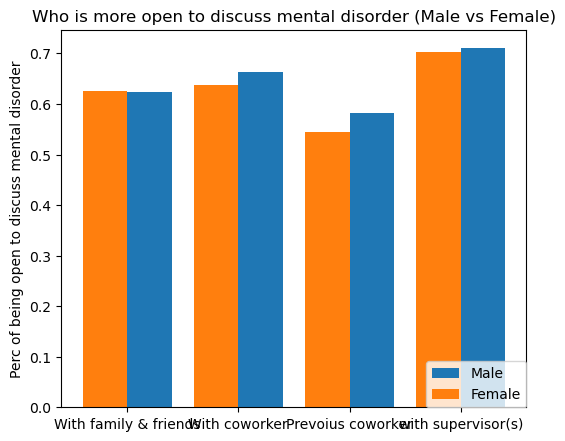

In [21]:
# Chart the results
Xs = ['With family & friends', 'With coworker', 'Prevoius coworker','with supervisor(s)']
male_perc = [male_ff, male_cw, male_pre_co, male_sup]
female_perc = [female_ff, female_cw, female_pre_co, female_sup]
x_pos = np.arange(len(Xs))
fig=plt.figure(figsize=(6,5), dpi= 100, facecolor='w', edgecolor='k')
plt.xticks(x_pos, Xs)
plt.ylabel("Perc of being open to discuss mental disorder")
plt.title('Who is more open to discuss mental disorder (Male vs Female)')
plt.bar(x_pos+0.2, male_perc, width=0.4, label='Male')
plt.bar(x_pos-0.2, female_perc, width=0.4, label='Female')
plt.legend(["Male", "Female"], loc='lower right', ncol=1, borderaxespad=0.)

### ------------------------------------------------------------------------------------------------------------

### Is getting older make you more vulnerable to mental health issues?

In [22]:
# In order to answer this question we need to group the age of the participants to (20s, 30s, 40s, above 50)
_20s = df[(df['What is your age?'] > 14) & (df['What is your age?'] < 30)]['What is your age?'].count()
_30s = df[(df['What is your age?'] > 29) & (df['What is your age?'] < 40)]['What is your age?'].count()
_40s = df[(df['What is your age?'] > 39) & (df['What is your age?'] < 50)]['What is your age?'].count()
above_50 = df[df['What is your age?'] > 49]['What is your age?'].count()

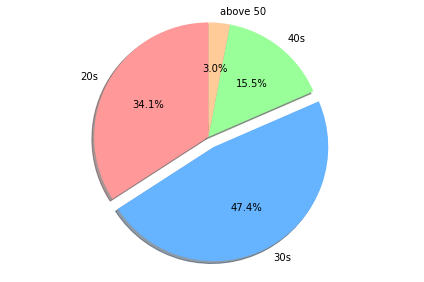

In [23]:
# Pie chart
labels = ['20s', '30s', '40s', 'above 50']
sizes = [_20s, _30s, _40s, above_50]
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0.1, 0, 0)
#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()

In [24]:
# Now let's count the participants who have mental disorder based on their age group
with_md_20s = df[(df['What is your age?'] > 14) & (df['What is your age?'] < 30) &\
                  (df['Do you currently have a mental health disorder?'].isin(['Yes', 'Maybe']))].shape[0]

with_md_30s = df[(df['What is your age?'] > 29) & (df['What is your age?'] < 40) &\
                  (df['Do you currently have a mental health disorder?'].isin(['Yes', 'Maybe']))].shape[0]

with_md_40s = df[(df['What is your age?'] > 39) & (df['What is your age?'] < 50) &\
                  (df['Do you currently have a mental health disorder?'].isin(['Yes', 'Maybe']))].shape[0]

with_md_above_50 = df[(df['What is your age?'] > 49) &\
                     (df['Do you currently have a mental health disorder?'].isin(['Yes', 'Maybe']))].shape[0]

In [25]:
# Calculate the percentage for each age group
perc_20s_with_md = with_md_20s / _20s
perc_30s_with_md = with_md_30s / _30s
perc_40s_with_md = with_md_40s / _40s
perc_50_with_md = with_md_above_50 / above_50

In [26]:
# Now let's see our data in a table
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Age", "Age Count", "With Mental Disorder", "Percentage"]

x.add_row(["20s", _20s, with_md_20s, perc_20s_with_md])
x.add_row(["30s", _30s, with_md_30s, perc_30s_with_md])
x.add_row(["40s", _40s, with_md_40s, perc_40s_with_md])
x.add_row(["Above 50", above_50, with_md_above_50, perc_50_with_md])

print(x)

+----------+-----------+----------------------+---------------------+
|   Age    | Age Count | With Mental Disorder |      Percentage     |
+----------+-----------+----------------------+---------------------+
|   20s    |    386    |         240          |  0.6217616580310881 |
|   30s    |    536    |         325          |  0.6063432835820896 |
|   40s    |    175    |         113          |  0.6457142857142857 |
| Above 50 |     34    |          16          | 0.47058823529411764 |
+----------+-----------+----------------------+---------------------+


Text(0.5, 1.0, 'Age & Mental Disorder')

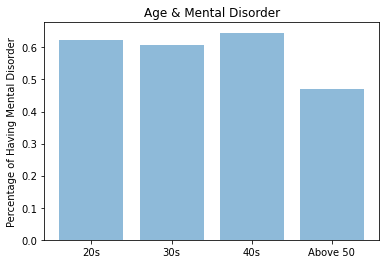

In [27]:
# Graph the percentage for all group
objects = ('20s', '30s', '40s', 'Above 50')
y_pos = np.arange(len(objects))
p = [perc_20s_with_md,perc_30s_with_md,perc_40s_with_md,perc_50_with_md]

plt.bar(y_pos, p, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Percentage of Having Mental Disorder')
plt.title("Age & Mental Disorder")